## Introduction and Objective

In my study, I discover the effects of high-frequency noise on an image and apply a denoising approach to improve image quality. 

My process begins by introducing random noise to an image, simulating real-world distortions. Additionally, I extract high-frequency noise using the Laplacian operator, which highlights sharp intensity variations such as edges and fine details. The noisy image is then added with the extracted high-frequency noise to create a more difficult denoising problem.

To reduce noise while preserving important image structures, I apply a two-step filtering approach:

- Gaussian Blur – Smooths the image and reduces minor variations in intensity.
- Bilateral Filtering – Further reduces noise while preserving edges by considering both spatial proximity and color similarity of pixels.

After filtering, the final image appears smoother with reduced noise, though some fine details are slightly blurred.

## Implementation with Justification

### Step 1: Load an image and add random noise

My initial step is to add random noise between 0 and 30 in each channel (R,G,B).

In [87]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('bird.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def add_random_noise(image, noise_level=50):
    noise = np.random.randint(0, noise_level, image.shape, dtype='uint8')
    noisy_image = cv2.add(image, noise)
    return noisy_image


## Step 2: Design a filtering approach 

To generate high-frequency noise from noise image, I use a filtering approach which from image extracted low pass filtering, and I use guassian filter in this case.

(np.float64(-0.5), np.float64(507.5), np.float64(370.5), np.float64(-0.5))

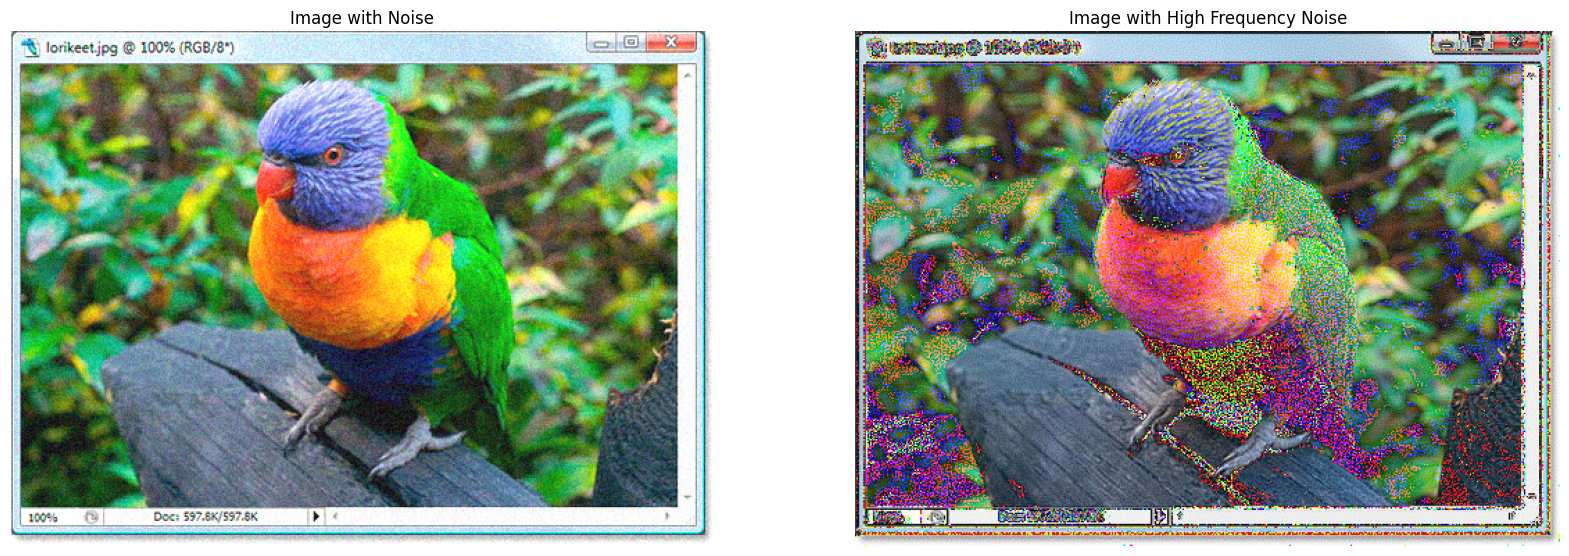

In [88]:
noisy_image = add_random_noise(image)

low_pass_filter_guassian = cv2.GaussianBlur(noisy_image, (3,3), sigmaX=1.0)

high_frequency_noise = noisy_image - low_pass_filter_guassian

image_with_high_frequency_noise = image + high_frequency_noise

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title("Image with Noise")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_with_high_frequency_noise)
plt.title("Image with High Frequency Noise")
plt.axis('off')

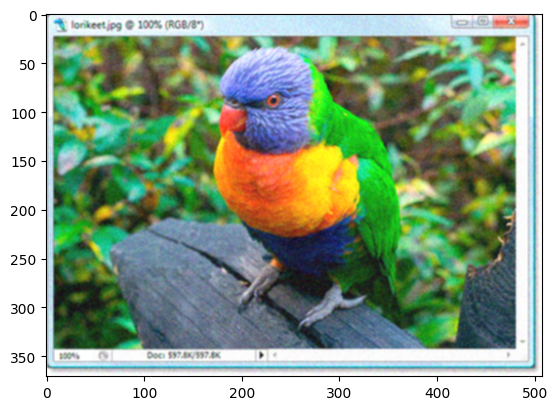

In [89]:
#image = both highpass + lowpass

denoised_image = noisy_image - high_frequency_noise

plt.imshow(denoised_image)

## Step 3: Display results 

## Conclusion 

My approach for this filtering is to apply a Gaussian filtering first to smooth image by reducing noise and minor variation in intensity. 

This first filtering removes small random noise and it prepares the image for the next filtering step, which is Bilateral Filter. 

The second filter smooth images by choosing three parameters (d=9, sigmaColor=60, and sigmaSpace=60). 

- d: detemine the area of pixels for filtering. 
- sigmaColor: control how much pixels with different colors are mixed.
- sigmaSpace: control how much pixels further from center affect filtering.

After applying both filtering technique, final image appear too smooth, meaning fine details (texture, feather, edges) are slghtly blur.

My future work is to make those fine details more clear by applying sharpening filtering so the image looks more sharpening. While the high-frequency noise mostly reduced, the residual noise might still exist in the image. I will use cv2.fastNlMeansDenoisingColored() after bilateral filtering for further denoising.